<a href="https://colab.research.google.com/github/AviFeygin/EECS-4080/blob/main/Israpol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [1]:
pip install scikit-lego

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install lowess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy
import torch
import scipy
import scipy.interpolate
import pandas as pd
import matplotlib.pyplot as plt
import keras as ker
import seaborn as sea
import xlrd as xlr
import numpy as np
from numpy.random import normal

import matplotlib.pyplot as plt
# import pymc3 as pm
# import theano
import statsmodels.api as stm

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#ignore all warnings
import warnings
warnings.filterwarnings('ignore')
sea.set()

import itertools
!pip install --upgrade xlrd

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 30
from vega_datasets import data

verbose = 0

import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Downloading Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = '/content/drive/MyDrive/Polls/Polls.xlsx'
polls = pd.read_excel(data)
polls_2021 = pd.read_excel(data, sheet_name=0, index_col=0)
display(polls)
election_results = polls[polls['Polling_Firm'] == 'Election results[5]']

,Date,Polling_Firm,Publisher,Poll_Size,Margin_Of_Error,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,...,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
0,2021-03-23 00:00:01,Election results[5],NaN,NaN,0.0,0.000000,30.0,17.0,8.0,6.0,...,4.0,7.0,6.0,7.00,6.00,0.00,56.00,32.00,16,16.0
1,2021-03-20 00:00:02,Smith,Mako[12],900.0,3.1,2.999988,31.0,19.0,4.0,8.0,...,4.0,9.0,9.0,5.00,5.00,1.68,61.00,28.00,15,16.0
2,2021-03-19 00:00:03,Camil Fuchs,Channel 13[7],1103.0,3.4,3.999977,30.0,18.0,4.0,8.0,...,4.0,10.0,10.0,6.00,5.00,0.00,61.00,28.00,15,16.0
3,2021-03-19 00:00:04,Midgam/iPanel,Channel 12[8],1000.0,3.1,3.999965,32.0,18.0,4.0,8.0,...,4.0,9.0,9.0,6.00,4.00,1.56,61.00,28.00,15,16.0
4,2021-03-19 00:00:05,Kantar,Kan 11[11],1406.0,2.6,3.999954,31.0,19.0,4.0,8.0,...,4.0,9.0,9.0,5.00,5.00,1.68,61.00,28.00,15,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2020-06-17 00:02:35,Direct Polls,–[189],NaN,NaN,278.998218,41.0,15.0,11.0,16.0,...,0.0,7.0,0.0,1.32,0.60,0.00,56.60,27.32,17,21.0
155,2020-06-17 00:02:36,Smith,The Jerusalem Post[190],NaN,NaN,278.998206,41.0,15.0,10.0,16.0,...,0.0,8.0,0.0,2.76,1.68,0.00,58.68,27.76,16,22.0
156,2020-06-11 00:02:37,Maagar Mohot,103fm[191],NaN,NaN,284.998194,41.0,16.0,13.0,15.0,...,0.0,6.0,0.0,0.00,0.00,0.00,54.00,29.00,17,20.0
157,2020-06-08 00:02:38,Midgam,Channel 12[192],NaN,NaN,287.998183,40.0,14.0,12.0,15.0,...,0.0,8.0,0.0,2.28,0.48,0.00,57.48,28.28,16,21.0


In [7]:
display(polls['Poll_Size'])

0         NaN
1       900.0
2      1103.0
3      1000.0
4      1406.0
        ...  
154       NaN
155       NaN
156       NaN
157       NaN
158       NaN
Name: Poll_Size, Length: 159, dtype: float64

In [8]:
display(election_results)

,Date,Polling_Firm,Publisher,Poll_Size,Margin_Of_Error,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,...,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
0,2021-03-23 00:00:01,Election results[5],NaN,NaN,0.0,0.0,30.0,17.0,8.0,6.0,...,4.0,7.0,6.0,7.0,6.0,0.0,56.0,32.0,16,16.0


Get all the unique firms for error calculations

In [9]:
polls['Polling_Firm'].unique()

array(['Election results[5]', 'Smith', 'Camil Fuchs', 'Midgam/iPanel',
       'Kantar', 'Panels Politics', 'Direct Polls', 'Maagar Mohot',
       'Geocartographia', 'Midgam'], dtype=object)

In [10]:
print("polls_2021 shape:")
print(polls_2021.shape)
just_polls = polls_2021.iloc[0:161, 4:25]

#fixing the float errors
just_polls['Days_Before_Election'] = just_polls['Days_Before_Election'].round().astype('int')

number_of_parties = 14
number_of_blocs = 4

polls_2021 shape:
(159, 23)


In [11]:
display(just_polls)

,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
Date,,,,,,,,,,,,,,,,,,,
2021-03-23 00:00:01,0,30.0,17.0,8.0,6.0,9.0,7.0,7.0,6.0,4.0,7.0,6.0,7.00,6.00,0.00,56.00,32.00,16,16.0
2021-03-20 00:00:02,3,31.0,19.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,5.00,5.00,1.68,61.00,28.00,15,16.0
2021-03-19 00:00:03,4,30.0,18.0,4.0,8.0,8.0,7.0,6.0,4.0,4.0,10.0,10.0,6.00,5.00,0.00,61.00,28.00,15,16.0
2021-03-19 00:00:04,4,32.0,18.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,6.00,4.00,1.56,61.00,28.00,15,16.0
2021-03-19 00:00:05,4,31.0,19.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,5.00,5.00,1.68,61.00,28.00,15,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,279,41.0,15.0,11.0,16.0,10.0,7.0,8.0,5.0,0.0,7.0,0.0,1.32,0.60,0.00,56.60,27.32,17,21.0
2020-06-17 00:02:36,279,41.0,15.0,10.0,16.0,9.0,7.0,8.0,6.0,0.0,8.0,0.0,2.76,1.68,0.00,58.68,27.76,16,22.0
2020-06-11 00:02:37,285,41.0,16.0,13.0,15.0,9.0,8.0,7.0,5.0,0.0,6.0,0.0,0.00,0.00,0.00,54.00,29.00,17,20.0


Parties

Additional Blocs

In [12]:
just_polls['Anti Bibi'] = just_polls['Yesh Atid']+just_polls['Blue & White']+just_polls['Joint List']+just_polls['Yisrael Beiteinu']+ just_polls['Meretz']+just_polls['Raam']+just_polls['Yamina']+ just_polls['New Hope']+just_polls['Labor']
just_polls['Pro Bibi'] = just_polls[['Likud','Shas', 'UTJ', 'Religious Zionist']].sum(axis=1)
just_polls['Current Gov'] = just_polls['Yesh Atid']+just_polls['Blue & White']+just_polls['Yisrael Beiteinu']+ just_polls['Meretz']+just_polls['Raam']+just_polls['Yamina']+ just_polls['New Hope']+just_polls['Labor']

In [13]:
display(just_polls['Pro Bibi'])

Date
2021-03-23 00:00:01    52.00
2021-03-20 00:00:02    51.00
2021-03-19 00:00:03    50.00
2021-03-19 00:00:04    51.00
2021-03-19 00:00:05    51.00
                       ...  
2020-06-17 00:02:35    58.60
2020-06-17 00:02:36    58.68
2020-06-11 00:02:37    58.00
2020-06-08 00:02:38    56.48
2020-05-26 00:02:39    59.56
Name: Pro Bibi, Length: 159, dtype: float64

In [14]:
display(polls)

,Date,Polling_Firm,Publisher,Poll_Size,Margin_Of_Error,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,...,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
0,2021-03-23 00:00:01,Election results[5],NaN,NaN,0.0,0.000000,30.0,17.0,8.0,6.0,...,4.0,7.0,6.0,7.00,6.00,0.00,56.00,32.00,16,16.0
1,2021-03-20 00:00:02,Smith,Mako[12],900.0,3.1,2.999988,31.0,19.0,4.0,8.0,...,4.0,9.0,9.0,5.00,5.00,1.68,61.00,28.00,15,16.0
2,2021-03-19 00:00:03,Camil Fuchs,Channel 13[7],1103.0,3.4,3.999977,30.0,18.0,4.0,8.0,...,4.0,10.0,10.0,6.00,5.00,0.00,61.00,28.00,15,16.0
3,2021-03-19 00:00:04,Midgam/iPanel,Channel 12[8],1000.0,3.1,3.999965,32.0,18.0,4.0,8.0,...,4.0,9.0,9.0,6.00,4.00,1.56,61.00,28.00,15,16.0
4,2021-03-19 00:00:05,Kantar,Kan 11[11],1406.0,2.6,3.999954,31.0,19.0,4.0,8.0,...,4.0,9.0,9.0,5.00,5.00,1.68,61.00,28.00,15,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2020-06-17 00:02:35,Direct Polls,–[189],NaN,NaN,278.998218,41.0,15.0,11.0,16.0,...,0.0,7.0,0.0,1.32,0.60,0.00,56.60,27.32,17,21.0
155,2020-06-17 00:02:36,Smith,The Jerusalem Post[190],NaN,NaN,278.998206,41.0,15.0,10.0,16.0,...,0.0,8.0,0.0,2.76,1.68,0.00,58.68,27.76,16,22.0
156,2020-06-11 00:02:37,Maagar Mohot,103fm[191],NaN,NaN,284.998194,41.0,16.0,13.0,15.0,...,0.0,6.0,0.0,0.00,0.00,0.00,54.00,29.00,17,20.0
157,2020-06-08 00:02:38,Midgam,Channel 12[192],NaN,NaN,287.998183,40.0,14.0,12.0,15.0,...,0.0,8.0,0.0,2.28,0.48,0.00,57.48,28.28,16,21.0


In [15]:
Smith = polls_2021[polls_2021['Polling_Firm']== 'Smith']
Camil_Fuchs = polls_2021[polls_2021['Polling_Firm']== 'Camil Fuchs']
Midgam_iPanel = polls_2021[polls_2021['Polling_Firm']== 'Midgam/iPanel']
Kantar = polls_2021[polls_2021['Polling_Firm']== 'Kantar']
Panels_Politics = polls_2021[polls_2021['Polling_Firm']== 'Panels Politics']
Direct_polls_2021 = polls_2021[polls_2021['Polling_Firm']== 'Direct polls_2021']
Maagar_Mohot = polls_2021[polls_2021['Polling_Firm']== 'Maagar Mohot']
Geocartographia = polls_2021[polls_2021['Polling_Firm']== 'Geocartographia']
Midgam = polls_2021[polls_2021['Polling_Firm'] == 'Midgam']

display(Midgam)

,Polling_Firm,Publisher,Poll_Size,Margin_Of_Error,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,...,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-16 00:02:12,Midgam,Channel 12[166],NaN,NaN,218.998484,30.0,16.0,12.0,15.0,7.0,...,0.0,18.0,0.0,2.16,0.24,0.0,56.24,30.16,15,21.0
2020-08-07 00:02:16,Midgam,Channel 12[170],NaN,NaN,227.998437,31.0,18.0,11.0,15.0,8.0,...,0.0,16.0,0.0,2.28,0.48,0.0,54.48,31.28,16,21.0
2020-07-23 00:02:24,Midgam,Channel 12[178],NaN,NaN,242.998345,32.0,18.0,9.0,15.0,8.0,...,0.0,15.0,0.0,2.16,0.00,0.0,54.00,29.16,16,23.0
2020-07-06 00:02:32,Midgam,Channel 12[186],NaN,NaN,259.998252,37.0,15.0,11.0,15.0,9.0,...,0.0,11.0,0.0,2.52,1.08,0.0,57.08,28.52,16,22.0
2020-06-08 00:02:38,Midgam,Channel 12[192],NaN,NaN,287.998183,40.0,14.0,12.0,15.0,9.0,...,0.0,8.0,0.0,2.28,0.48,0.0,57.48,28.28,16,21.0


In [16]:
likud = just_polls[['Days_Before_Election','Likud']]
#display(likud)
yesh_atid = just_polls[['Days_Before_Election','Yesh Atid']]
blue_and_white = just_polls[['Days_Before_Election','Blue & White']]
joint_list = just_polls[['Days_Before_Election','Joint List']]
shas = just_polls[['Days_Before_Election','Shas']]
utj = just_polls[['Days_Before_Election','UTJ']]
beiteinu = just_polls[['Days_Before_Election','Yisrael Beiteinu']]
meretz = just_polls[['Days_Before_Election','Meretz']]
raam = just_polls[['Days_Before_Election','Raam']]
yamina = just_polls[['Days_Before_Election','Yamina']]
new_hope = just_polls[['Days_Before_Election','New Hope']]
Labor = just_polls[['Days_Before_Election','Labor']]
religious_zionist = just_polls[['Days_Before_Election','Religious Zionist']]


Blocs


In [17]:
right_wing  = just_polls[['Days_Before_Election','Right Wing']]
left_wing   = just_polls[['Days_Before_Election','Left Wing']]
religious   = just_polls[['Days_Before_Election','religious']]
arab        = just_polls[['Days_Before_Election','Arab']]
anti_bibi   = just_polls[['Days_Before_Election','Anti Bibi']]
pro_bibi    = just_polls[['Days_Before_Election','Pro Bibi']]
current_gov = just_polls[['Days_Before_Election','Current Gov']]

Defining a LOESS function
it will take in a panda frame column and return the loess column

# LOESS Function


Loess Function


In [18]:
#Frame must be a column dataframe with time indexing, delta is an integer that should be the time interval and days which is unique days of the set
#returns new frame with loess and same time indexing
# freame.loc[frame['set_of_numbers'] <= 4, 'equal_or_lower_than_4?'] = 'True' 
# frame.loc[frame['set_of_numbers'] > 4, 'equal_or_lower_than_4?'] = 'False' 
verbose =0
just_polls['Days_Before_Election'].nunique()
def LOESS(frame, delta = 2, days = 1, name = 'Likud'):
  display(frame.shape)
  delta = (delta-1)/2
  length = len(frame.index)
  Loess_frame = pd.DataFrame()
  temp = pd.DataFrame()
  #above_35 = titanic[titanic["Age"] > 35]
  for i in range(3, frame['Days_Before_Election'].max()):
   temp = frame[(frame['Days_Before_Election'] <= (i+delta)) & (frame['Days_Before_Election'] >= (i-delta)) ]
   if len(temp.index)>0:
    x = temp['Days_Before_Election'].values.reshape(-1,1)
 
    y = temp[name].values.reshape(len(temp.index),1)

    if (verbose == 1):
       print("i: ")
       display(i)
       print("y: ")
       display(y)
       print("x: ")
       display(x)


    model = linear_model.LinearRegression().fit(x, y)
    linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    if verbose ==1:
     display(model.predict([[i]]))
    Loess_frame.append([i, model.predict([[i]])])
    if verbose ==1:
     display(Loess_frame)
  return Loess_frame





In [19]:
verbose = 0
delta = 3
likud_Loess             = LOESS(likud, delta, just_polls['Days_Before_Election'].nunique(), 'Likud')
yesh_atid_Loess         = LOESS(yesh_atid, delta, just_polls['Days_Before_Election'].nunique(), 'Yesh Atid')
blue_and_white_Loess    = LOESS(blue_and_white,delta, just_polls['Days_Before_Election'].nunique(), 'Blue & White')
joint_list_Loess        = LOESS(joint_list, delta ,just_polls['Days_Before_Election'].nunique(), 'Joint List')
shas_Loess              = LOESS(shas, delta, just_polls['Days_Before_Election'].nunique(), 'Shas')
utj_Loess               = LOESS(utj, delta, just_polls['Days_Before_Election'].nunique(), 'UTJ')
beiteinu_Loess          = LOESS(beiteinu, delta, just_polls['Days_Before_Election'].nunique(), 'Yisrael Beiteinu')
meretz_Loess            = LOESS(meretz, delta, just_polls['Days_Before_Election'].nunique(), 'Meretz')
raam_Loess              = LOESS(raam, delta, just_polls['Days_Before_Election'].nunique(), 'Raam')
yamina_Loess            = LOESS(yamina, delta, just_polls['Days_Before_Election'].nunique(), 'Yamina')
new_hope_Loess          = LOESS(new_hope, delta, just_polls['Days_Before_Election'].nunique(), 'New Hope')
Labor_Loess             = LOESS(Labor, delta, just_polls['Days_Before_Election'].nunique(), 'Labor')
religious_zionist_Loess = LOESS(religious_zionist, delta, just_polls['Days_Before_Election'].nunique(), 'Religious Zionist')

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

In [20]:
right_wing_Loess  = LOESS(right_wing, delta, just_polls['Days_Before_Election'].nunique(),'Right Wing')
left_wing_Loess   = LOESS(left_wing, delta, just_polls['Days_Before_Election'].nunique(),'Left Wing')
religious_Loess   = LOESS(religious, delta, just_polls['Days_Before_Election'].nunique(),'religious')
arab_Loess        = LOESS(arab, delta, just_polls['Days_Before_Election'].nunique(),'Arab')
anti_bibi_Loess   = LOESS(anti_bibi, delta,just_polls['Days_Before_Election'].nunique(),'Anti Bibi')
pro_bibi_Loess    = LOESS(pro_bibi, delta,just_polls['Days_Before_Election'].nunique(),'Pro Bibi')
current_gov_Loess = LOESS(current_gov, delta,just_polls['Days_Before_Election'].nunique(),'Current Gov')

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

(159, 2)

In [21]:
display(pro_bibi_Loess)

""


#Defining the LOWESS function

In [22]:
#Frame must be a column dataframe with time indexing, delta is an integer that should be the time interval and days which is unique days of the set
#returns new frame with loess and same time indexing
# freame.loc[frame['set_of_numbers'] <= 4, 'equal_or_lower_than_4?'] = 'True' 
# frame.loc[frame['set_of_numbers'] > 4, 'equal_or_lower_than_4?'] = 'False' 
verbose =0
just_polls['Days_Before_Election'].nunique()
def LOWESS(frame, delta = 2, days = 1, name = 'Likud'):
  display(frame.shape)
  delta = (delta-1)/2
  length = len(frame.index)
  Loess_frame = pd.DataFrame()
  temp = pd.DataFrame()
  #above_35 = titanic[titanic["Age"] > 35]
  for i in range(3, frame['Days_Before_Election'].max()):
   temp = frame[(frame['Days_Before_Election'] <= (i+delta)) & (frame['Days_Before_Election'] >= (i-delta)) ]
   if len(temp.index)>0:
    x = temp['Days_Before_Election'].values.reshape(-1,1)
 
    y = temp[name].values.reshape(len(temp.index),1)

    if (verbose == 1):
       print("i: ")
       display(i)
       print("y: ")
       display(y)
       print("x: ")
       display(x)


    model = linear_model.LinearRegression().fit(x, y)
    linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    if verbose ==1:
     display(model.predict([[i]]))
    Loess_frame.append([i, model.predict([[i]])])
    if verbose ==1:
     display(Loess_frame)
  return Loess_frame







seperate just polls into parties and blocs

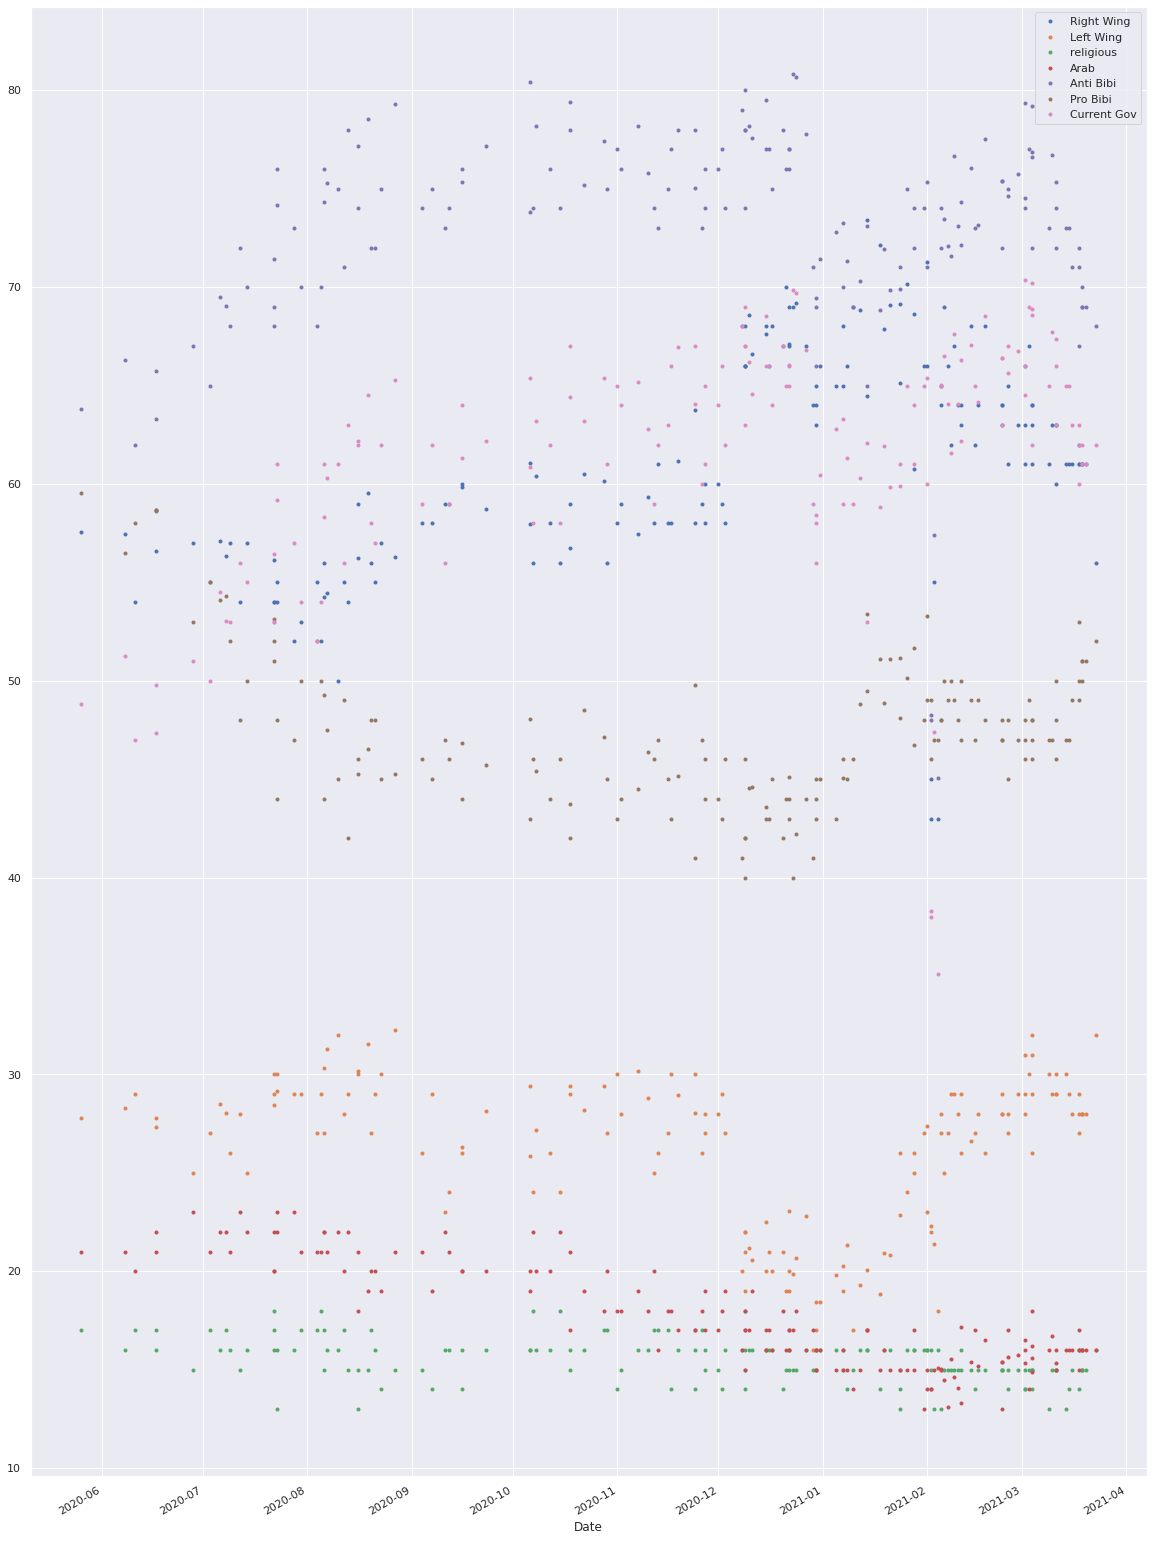

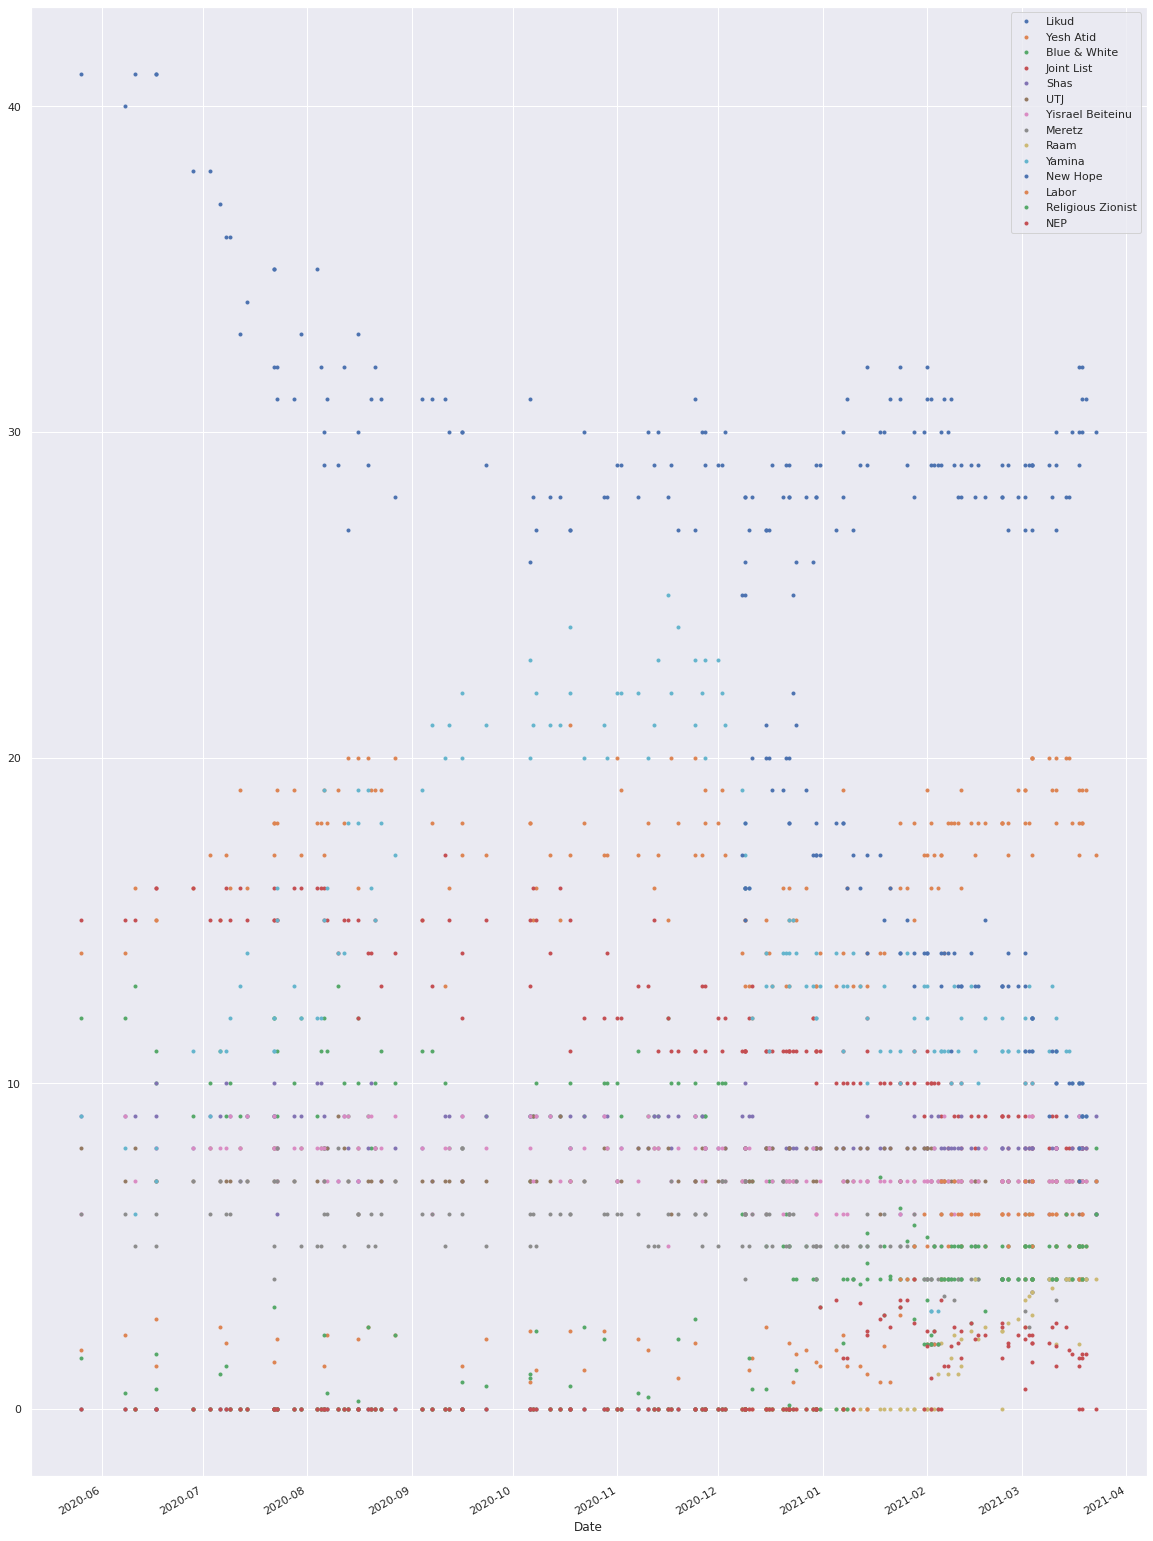

In [23]:
just_polls_parties = just_polls.iloc[:, 0:15]
just_polls_blocks = just_polls.iloc[:,15:22]
#[:,-1] rows and columns
just_polls_blocks.plot(figsize=(20, 30, ), style =".")
just_polls_parties.drop(['Days_Before_Election'], axis = 1).plot(figsize=(20,30), style = ".")

In [24]:
display(just_polls_blocks)

,Right Wing,Left Wing,religious,Arab,Anti Bibi,Pro Bibi,Current Gov
Date,,,,,,,
2021-03-23 00:00:01,56.00,32.00,16,16.0,68.00,52.00,62.00
2021-03-20 00:00:02,61.00,28.00,15,16.0,69.00,51.00,61.00
2021-03-19 00:00:03,61.00,28.00,15,16.0,70.00,50.00,62.00
2021-03-19 00:00:04,61.00,28.00,15,16.0,69.00,51.00,61.00
2021-03-19 00:00:05,61.00,28.00,15,16.0,69.00,51.00,61.00
...,...,...,...,...,...,...,...
2020-06-17 00:02:35,56.60,27.32,17,21.0,63.32,58.60,47.32
2020-06-17 00:02:36,58.68,27.76,16,22.0,65.76,58.68,49.76
2020-06-11 00:02:37,54.00,29.00,17,20.0,62.00,58.00,47.00


In [25]:
display(just_polls_parties)

,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP
Date,,,,,,,,,,,,,,,
2021-03-23 00:00:01,0,30.0,17.0,8.0,6.0,9.0,7.0,7.0,6.0,4.0,7.0,6.0,7.00,6.00,0.00
2021-03-20 00:00:02,3,31.0,19.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,5.00,5.00,1.68
2021-03-19 00:00:03,4,30.0,18.0,4.0,8.0,8.0,7.0,6.0,4.0,4.0,10.0,10.0,6.00,5.00,0.00
2021-03-19 00:00:04,4,32.0,18.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,6.00,4.00,1.56
2021-03-19 00:00:05,4,31.0,19.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,5.00,5.00,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,279,41.0,15.0,11.0,16.0,10.0,7.0,8.0,5.0,0.0,7.0,0.0,1.32,0.60,0.00
2020-06-17 00:02:36,279,41.0,15.0,10.0,16.0,9.0,7.0,8.0,6.0,0.0,8.0,0.0,2.76,1.68,0.00
2020-06-11 00:02:37,285,41.0,16.0,13.0,15.0,9.0,8.0,7.0,5.0,0.0,6.0,0.0,0.00,0.00,0.00


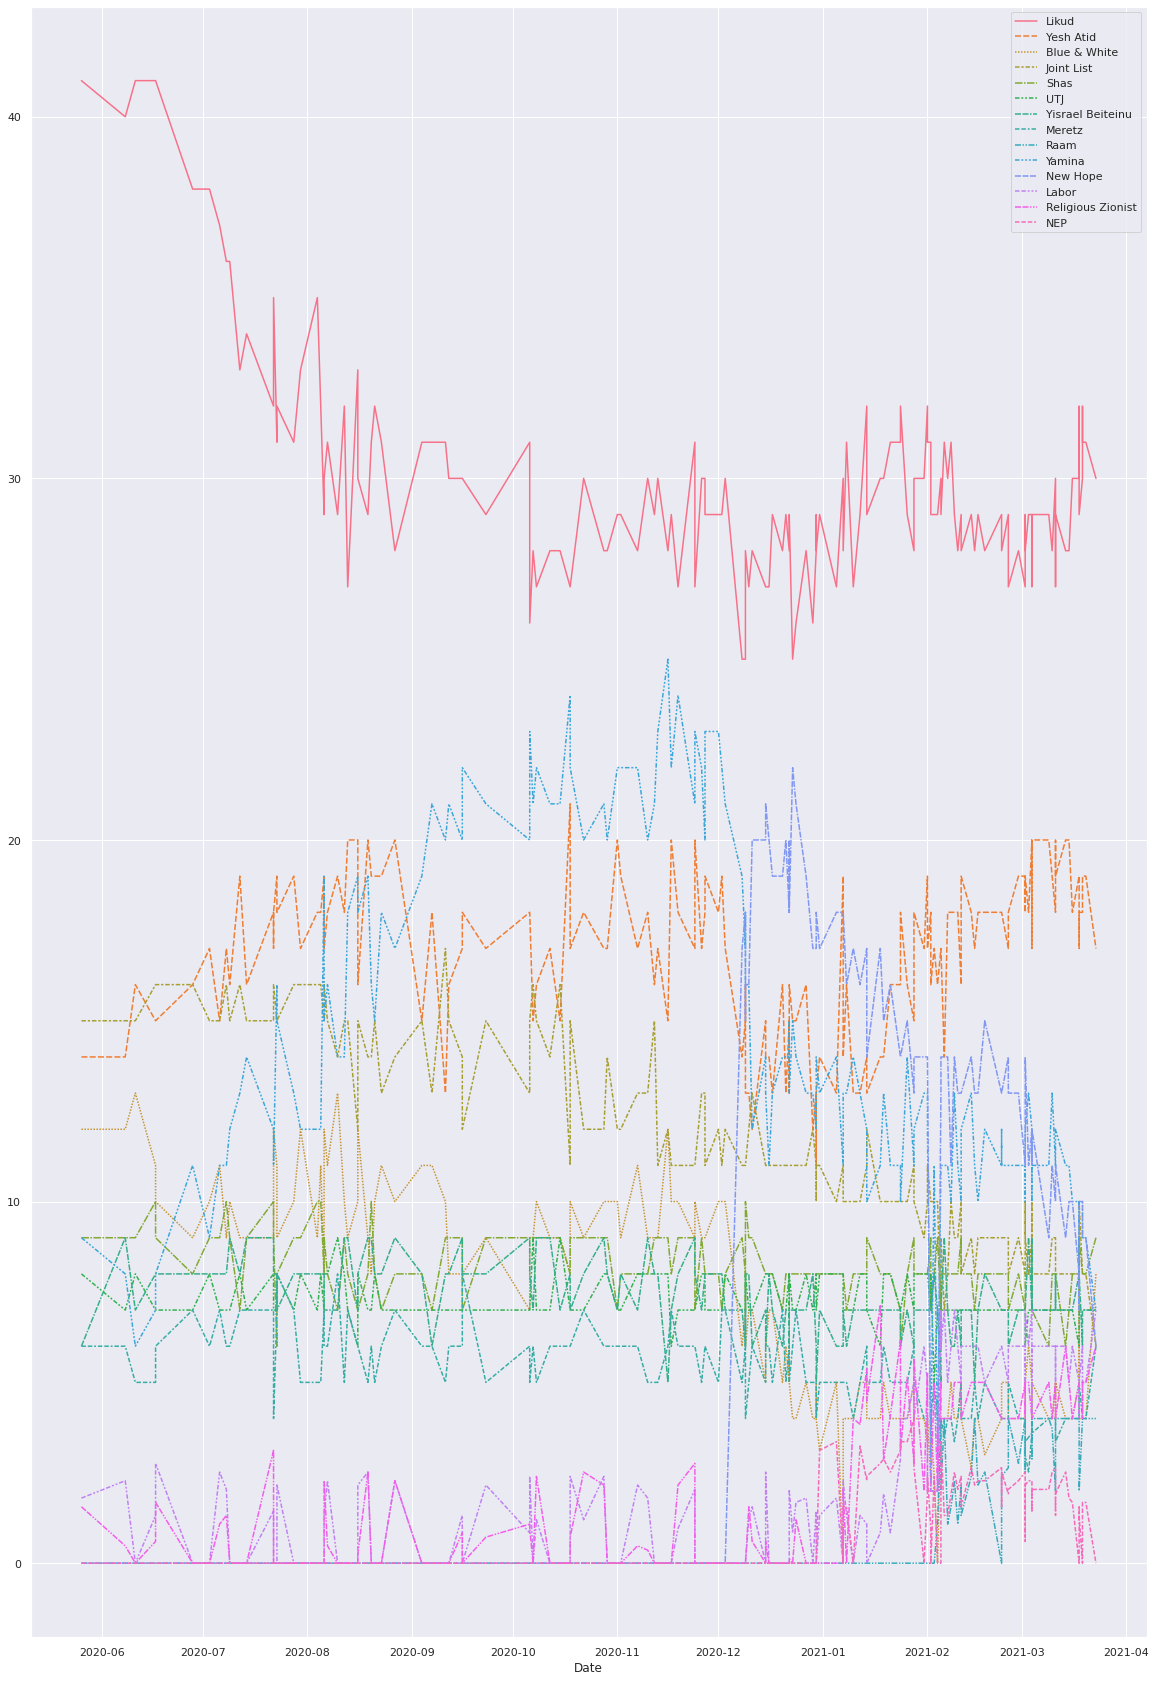

In [26]:
fig, ax = plt.subplots(figsize=(20,30))
sea.lineplot(data = just_polls_parties.drop('Days_Before_Election', axis =1 ),ci="sd")


In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    delta = 3
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog, frac=(10/159))
    index, data = np.transpose(smooth)

    return pd.Series(data, index=pd.to_datetime(index)) 

Once the package has been installed it can be imported into a python script
import lowess
The package provides a single module lowess with a single function lowess.lowess. This function has the signiture:
lowess.lowess(x, y, bandwidth=0.2, polynomialDegree=1)
where the arguments are:

x (pandas.core.series.Series): a Pandas Series containing the x (independent/covariat) values. The indices must be unique.
y (pandas.core.series.Series): a Pandas Series containing the y (dependent) values. It must have the same index as x (although not necessarily in the same order.)
bandwidth (float, optional): the bandwidth for smoothing. It must be between 0 and 1. Default is 0.2
polynomialDegree (int, optional): The degree of polynomial to use in the regression. It must be >= 0. Default is 1.
It returns a Pandas Series containing the smoothed y values, with the same index as y.

If the input is not valid or an error occurs, a LowessError exception is raised.

In [28]:
display(just_polls_parties.columns)

Index(['Days_Before_Election', 'Likud', 'Yesh Atid', 'Blue & White',
       'Joint List', 'Shas', 'UTJ', 'Yisrael Beiteinu', 'Meretz', 'Raam',
       'Yamina', 'New Hope', 'Labor', 'Religious Zionist', 'NEP'],
      dtype='object')

In [29]:
just_polls_parties_Lowess = just_polls_parties.copy()
for column in just_polls_parties.drop('Days_Before_Election', axis =1):
 just_polls_parties_Lowess[column] = make_lowess(just_polls_parties[column])

print('shape of both')
display(just_polls_parties.shape)
display(just_polls_parties_Lowess.shape)

just_polls_parties_error = just_polls_parties - just_polls_parties_Lowess
just_polls_parties_error['Days_Before_Election'] = just_polls_parties_Lowess['Days_Before_Election']
just_polls_parties_error['Polling_Firm'] = polls['Polling_Firm']
print('indexes are fine:')
just_polls_parties_Lowess.index.equals(just_polls_parties_error.index)

shape of both


(159, 15)

(159, 15)

indexes are fine:


True

In [30]:
display(just_polls_parties_Lowess)

,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP
Date,,,,,,,,,,,,,,,
2021-03-23 00:00:01,0,30.258771,17.351617,7.539230,6.245043,8.946102,7.024345,6.874626,5.754922,4.0,7.163907,6.505682,6.874706,5.894058,0.00
2021-03-20 00:00:02,3,30.662399,18.130687,4.951990,7.521309,8.236321,6.980719,7.074515,4.476113,4.0,8.742379,8.355987,5.668988,5.231911,1.68
2021-03-19 00:00:03,4,30.797567,18.409623,4.097661,7.924921,8.000000,6.964800,7.156061,4.041313,4.0,9.270883,8.979676,5.246903,4.991088,0.00
2021-03-19 00:00:04,4,30.797571,18.409627,4.097659,7.924923,8.000000,6.964800,7.156058,4.041312,4.0,9.270881,8.979680,5.246906,4.991088,1.56
2021-03-19 00:00:05,4,30.797576,18.409632,4.097657,7.924924,8.000000,6.964801,7.156055,4.041311,4.0,9.270878,8.979684,5.246908,4.991088,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,279,40.176335,15.263806,10.891895,15.573189,9.000000,7.175807,7.693180,5.832011,0.0,8.001208,0.000000,1.275561,0.322452,0.00
2020-06-17 00:02:36,279,40.176333,15.263807,10.891894,15.573189,9.000000,7.175807,7.693181,5.832012,0.0,8.001210,0.000000,1.275560,0.322452,0.00
2020-06-11 00:02:37,285,40.563343,14.880085,11.365470,15.390973,9.000000,7.341956,7.256427,5.781701,0.0,7.857363,0.000000,1.519530,0.586035,0.00


In [31]:
display()

In [32]:
from numpy.core.fromnumeric import size
just_polls_parties.drop('Days_Before_Election', axis =1).size

2226

In [33]:
just_polls_parties.index.size

159

In [34]:
party_list = list(just_polls_parties.columns)
del party_list[0]

In [35]:
display(party_list)

['Likud',
 'Yesh Atid',
 'Blue & White',
 'Joint List',
 'Shas',
 'UTJ',
 'Yisrael Beiteinu',
 'Meretz',
 'Raam',
 'Yamina',
 'New Hope',
 'Labor',
 'Religious Zionist',
 'NEP']

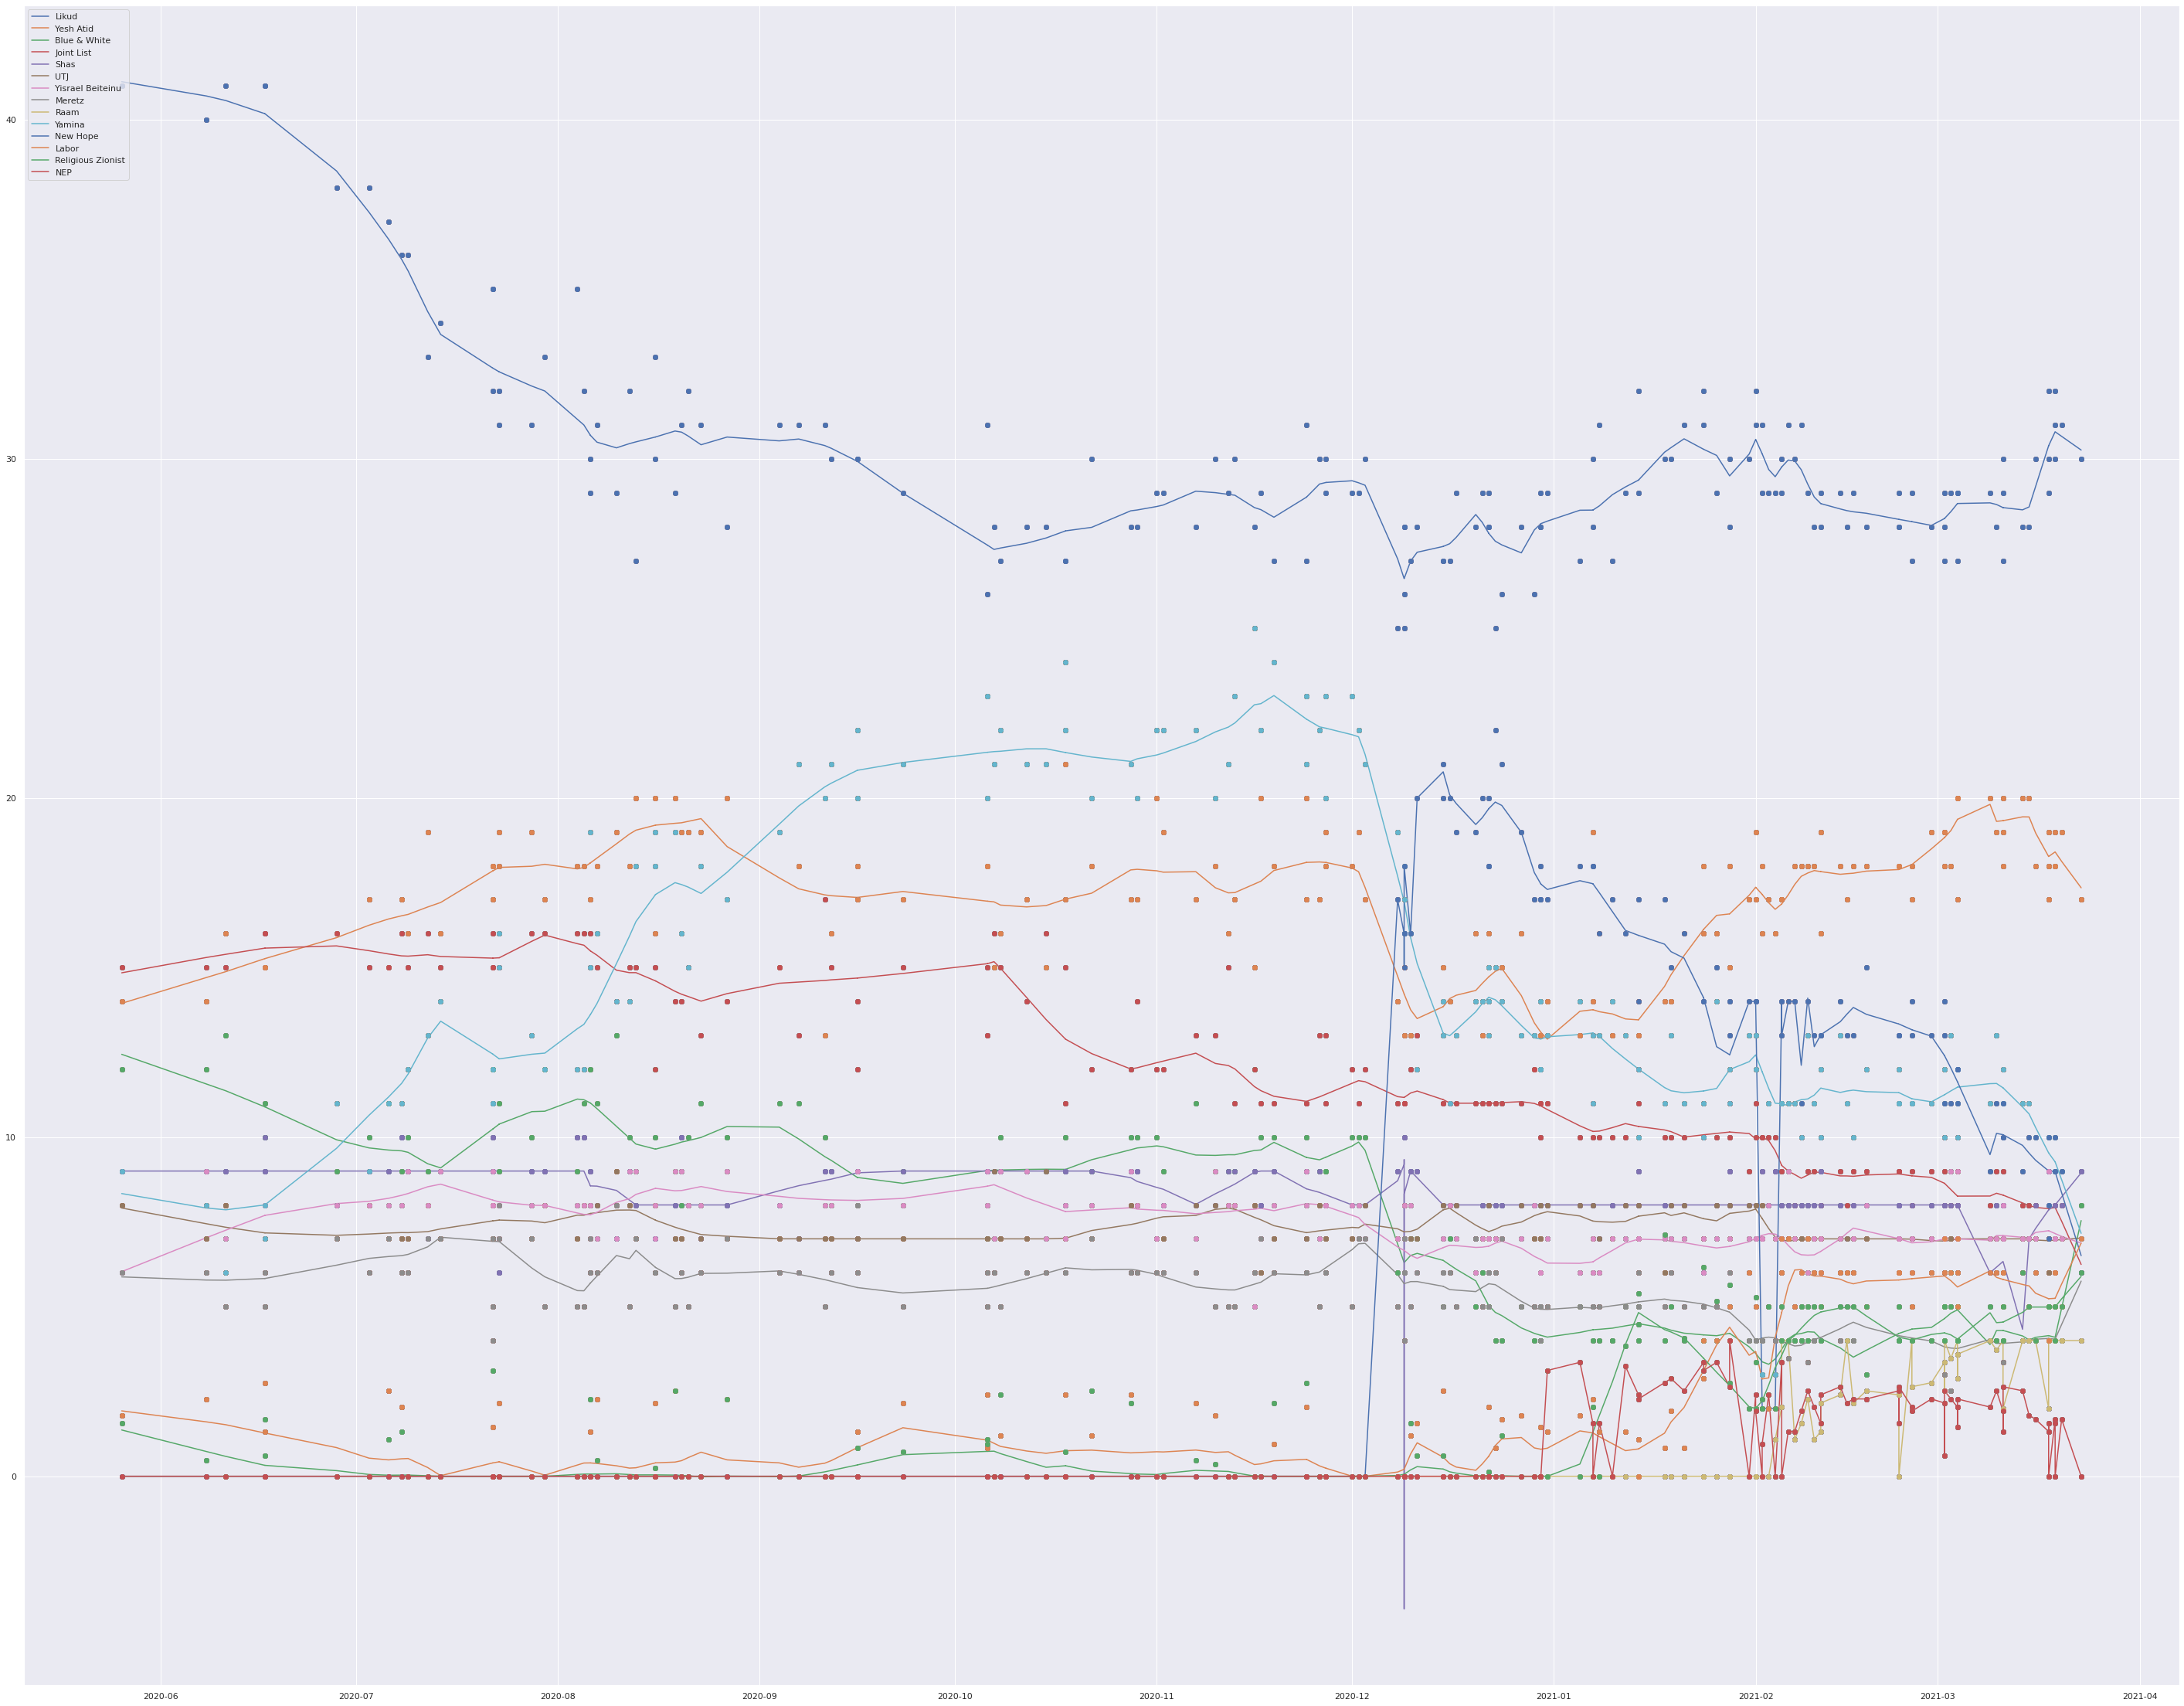

In [36]:
sea.set()
sea.set(rc={'figure.figsize':(50,40)})
sea.set_palette('deep')
p  = plt.plot(just_polls_parties_Lowess.index, just_polls_parties_Lowess.drop('Days_Before_Election', axis =1 ))
plt.legend(party_list , loc='upper left')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')
plt.plot(just_polls_parties.index, just_polls_parties.drop('Days_Before_Election', axis =1 ), 'o')

In [37]:
display(just_polls_parties)

,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP
Date,,,,,,,,,,,,,,,
2021-03-23 00:00:01,0,30.0,17.0,8.0,6.0,9.0,7.0,7.0,6.0,4.0,7.0,6.0,7.00,6.00,0.00
2021-03-20 00:00:02,3,31.0,19.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,5.00,5.00,1.68
2021-03-19 00:00:03,4,30.0,18.0,4.0,8.0,8.0,7.0,6.0,4.0,4.0,10.0,10.0,6.00,5.00,0.00
2021-03-19 00:00:04,4,32.0,18.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,6.00,4.00,1.56
2021-03-19 00:00:05,4,31.0,19.0,4.0,8.0,8.0,7.0,7.0,4.0,4.0,9.0,9.0,5.00,5.00,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,279,41.0,15.0,11.0,16.0,10.0,7.0,8.0,5.0,0.0,7.0,0.0,1.32,0.60,0.00
2020-06-17 00:02:36,279,41.0,15.0,10.0,16.0,9.0,7.0,8.0,6.0,0.0,8.0,0.0,2.76,1.68,0.00
2020-06-11 00:02:37,285,41.0,16.0,13.0,15.0,9.0,8.0,7.0,5.0,0.0,6.0,0.0,0.00,0.00,0.00


#Error Calculations


##polling error

###party specific error

In [38]:
just_polls_parties_error['Polling_Firm'] = polls_2021['Polling_Firm']
display(just_polls_parties_error)

,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Polling_Firm
Date,,,,,,,,,,,,,,,,
2021-03-23 00:00:01,0,-0.258771,-0.351617,0.460770,-0.245043,5.389848e-02,-0.024345,0.125374,0.245078,0.0,-0.163907,-0.505682,0.125294,0.105942,0.0,Election results[5]
2021-03-20 00:00:02,3,0.337601,0.869313,-0.951990,0.478691,-2.363207e-01,0.019281,-0.074515,-0.476113,0.0,0.257621,0.644013,-0.668988,-0.231911,0.0,Smith
2021-03-19 00:00:03,4,-0.797567,-0.409623,-0.097661,0.075079,-4.718004e-12,0.035200,-1.156061,-0.041313,0.0,0.729117,1.020324,0.753097,0.008912,0.0,Camil Fuchs
2021-03-19 00:00:04,4,1.202429,-0.409627,-0.097659,0.075077,-6.119549e-12,0.035200,-0.156058,-0.041312,0.0,-0.270881,0.020320,0.753094,-0.991088,0.0,Midgam/iPanel
2021-03-19 00:00:05,4,0.202424,0.590368,-0.097657,0.075076,-7.441159e-12,0.035199,-0.156055,-0.041311,0.0,-0.270878,0.020316,-0.246908,0.008912,0.0,Kantar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,279,0.823665,-0.263806,0.108105,0.426811,1.000000e+00,-0.175807,0.306820,-0.832011,0.0,-1.001208,0.000000,0.044439,0.277548,0.0,Direct Polls
2020-06-17 00:02:36,279,0.823667,-0.263807,-0.891894,0.426811,-1.156408e-12,-0.175807,0.306819,0.167988,0.0,-0.001210,0.000000,1.484440,1.357548,0.0,Smith
2020-06-11 00:02:37,285,0.436657,1.119915,1.634530,-0.390973,1.705303e-13,0.658044,-0.256427,-0.781701,0.0,-1.857363,0.000000,-1.519530,-0.586035,0.0,Maagar Mohot


In [39]:
just_polls_blocks_Lowess = just_polls_blocks.copy()
for column in just_polls_blocks:
 just_polls_blocks_Lowess[column] = make_lowess(just_polls_blocks[column])
 
 print('shape of both')
 display(just_polls_blocks.shape)
 display(just_polls_blocks_Lowess.shape)

just_polls_blocks_error = just_polls_blocks - just_polls_blocks_Lowess
just_polls_blocks_error['Days_Before_Election'] = just_polls_parties_Lowess['Days_Before_Election']
just_polls_blocks_error['Polling_Firm'] = polls['Polling_Firm']
print('indexes are fine:')
just_polls_blocks_Lowess.index.equals(just_polls_blocks_error.index)

shape of both


(159, 7)

(159, 7)

shape of both


(159, 7)

(159, 7)

shape of both


(159, 7)

(159, 7)

shape of both


(159, 7)

(159, 7)

shape of both


(159, 7)

(159, 7)

shape of both


(159, 7)

(159, 7)

shape of both


(159, 7)

(159, 7)

indexes are fine:


True

###block error


In [40]:
just_polls_blocks_error['Polling_Firm'] = polls_2021['Polling_Firm']
display(just_polls_blocks_error)
display(just_polls_blocks_error.shape)

,Right Wing,Left Wing,religious,Arab,Anti Bibi,Pro Bibi,Current Gov,Days_Before_Election,Polling_Firm
Date,,,,,,,,,
2021-03-23 00:00:01,-0.521520,0.466643,0.172539,-4.847197e-07,0.108805,-0.015346,0.256393,0,Election results[5]
2021-03-20 00:00:02,1.078974,-0.898996,-0.270091,-7.417443e-07,-0.067532,-0.007726,-0.442951,3,Smith
2021-03-19 00:00:03,-0.085730,-0.001129,-0.092563,-7.313852e-07,0.537819,-0.671642,0.666097,4,Camil Fuchs
2021-03-19 00:00:04,-0.085728,-0.001129,-0.092561,-7.313980e-07,-0.462174,0.328353,-0.333898,4,Midgam/iPanel
2021-03-19 00:00:05,-0.085726,-0.001129,-0.092560,-7.314435e-07,-0.462166,0.328348,-0.333894,4,Kantar
...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,-0.244899,-0.261235,0.648458,-3.367347e-01,-1.506517,1.442168,-1.887169,279,Direct Polls
2020-06-17 00:02:36,1.835102,0.178766,-0.351542,6.632650e-01,0.933482,1.522170,0.552829,279,Smith
2020-06-11 00:02:37,-2.987452,1.078348,0.487812,-1.099160e+00,-2.474601,0.134129,-2.034886,285,Maagar Mohot


(159, 9)

###All error


In [41]:
Error_all = pd.concat([just_polls_parties_error,just_polls_blocks_error], axis =1 )


In [42]:
display(Error_all)

,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,...,Polling_Firm,Right Wing,Left Wing,religious,Arab,Anti Bibi,Pro Bibi,Current Gov,Days_Before_Election,Polling_Firm
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-23 00:00:01,0,-0.258771,-0.351617,0.460770,-0.245043,5.389848e-02,-0.024345,0.125374,0.245078,0.0,...,Election results[5],-0.521520,0.466643,0.172539,-4.847197e-07,0.108805,-0.015346,0.256393,0,Election results[5]
2021-03-20 00:00:02,3,0.337601,0.869313,-0.951990,0.478691,-2.363207e-01,0.019281,-0.074515,-0.476113,0.0,...,Smith,1.078974,-0.898996,-0.270091,-7.417443e-07,-0.067532,-0.007726,-0.442951,3,Smith
2021-03-19 00:00:03,4,-0.797567,-0.409623,-0.097661,0.075079,-4.718004e-12,0.035200,-1.156061,-0.041313,0.0,...,Camil Fuchs,-0.085730,-0.001129,-0.092563,-7.313852e-07,0.537819,-0.671642,0.666097,4,Camil Fuchs
2021-03-19 00:00:04,4,1.202429,-0.409627,-0.097659,0.075077,-6.119549e-12,0.035200,-0.156058,-0.041312,0.0,...,Midgam/iPanel,-0.085728,-0.001129,-0.092561,-7.313980e-07,-0.462174,0.328353,-0.333898,4,Midgam/iPanel
2021-03-19 00:00:05,4,0.202424,0.590368,-0.097657,0.075076,-7.441159e-12,0.035199,-0.156055,-0.041311,0.0,...,Kantar,-0.085726,-0.001129,-0.092560,-7.314435e-07,-0.462166,0.328348,-0.333894,4,Kantar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,279,0.823665,-0.263806,0.108105,0.426811,1.000000e+00,-0.175807,0.306820,-0.832011,0.0,...,Direct Polls,-0.244899,-0.261235,0.648458,-3.367347e-01,-1.506517,1.442168,-1.887169,279,Direct Polls
2020-06-17 00:02:36,279,0.823667,-0.263807,-0.891894,0.426811,-1.156408e-12,-0.175807,0.306819,0.167988,0.0,...,Smith,1.835102,0.178766,-0.351542,6.632650e-01,0.933482,1.522170,0.552829,279,Smith
2020-06-11 00:02:37,285,0.436657,1.119915,1.634530,-0.390973,1.705303e-13,0.658044,-0.256427,-0.781701,0.0,...,Maagar Mohot,-2.987452,1.078348,0.487812,-1.099160e+00,-2.474601,0.134129,-2.034886,285,Maagar Mohot


##Accuracy comparison for polling companies

##Company error


In [43]:
Smith_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Smith'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Smith']], axis=1)
Camil_Fuchs_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Camil_Fuchs'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Camil_Fuchs']], axis=1)
Midgam_iPanel_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Midgam_iPanel'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Midgam_iPanel']], axis=1)
Kantar_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Kantar'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Kantar']], axis=1)
Panels_Politics_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Panels_Politics'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Panels_Politics']], axis=1)
Direct_Polls_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Direct_Polls'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Direct_Polls']], axis=1)
Maagar_Mohot_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Maagar_Mohot'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Maagar_Mohot']], axis=1)
Geocartographia_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Geocartographia'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Geocartographia']], axis=1)
Midgam_error = pd.concat([just_polls_parties_error[just_polls_parties_error['Polling_Firm'] == 'Midgam'], just_polls_blocks_error[polls_2021['Polling_Firm']=='Midgam']], axis=1)


###generating new elections


For random samples from N(\mu, \sigma^2), use:

sigma * np.random.randn(...) + mu

Examples

In [44]:
def generate_election_random(seed, count, dataframe):
  for column in dataframe:
   for row in dataframe:
     numpy.random.normal(loc=dataframe.iloc[column, row],scale=1.0,size=100)

In [45]:
display(Midgam)

,Polling_Firm,Publisher,Poll_Size,Margin_Of_Error,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,...,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-16 00:02:12,Midgam,Channel 12[166],NaN,NaN,218.998484,30.0,16.0,12.0,15.0,7.0,...,0.0,18.0,0.0,2.16,0.24,0.0,56.24,30.16,15,21.0
2020-08-07 00:02:16,Midgam,Channel 12[170],NaN,NaN,227.998437,31.0,18.0,11.0,15.0,8.0,...,0.0,16.0,0.0,2.28,0.48,0.0,54.48,31.28,16,21.0
2020-07-23 00:02:24,Midgam,Channel 12[178],NaN,NaN,242.998345,32.0,18.0,9.0,15.0,8.0,...,0.0,15.0,0.0,2.16,0.00,0.0,54.00,29.16,16,23.0
2020-07-06 00:02:32,Midgam,Channel 12[186],NaN,NaN,259.998252,37.0,15.0,11.0,15.0,9.0,...,0.0,11.0,0.0,2.52,1.08,0.0,57.08,28.52,16,22.0
2020-06-08 00:02:38,Midgam,Channel 12[192],NaN,NaN,287.998183,40.0,14.0,12.0,15.0,9.0,...,0.0,8.0,0.0,2.28,0.48,0.0,57.48,28.28,16,21.0


In [46]:
display(Smith_error)

,Days_Before_Election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,...,Polling_Firm,Right Wing,Left Wing,religious,Arab,Anti Bibi,Pro Bibi,Current Gov,Days_Before_Election,Polling_Firm
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-20 00:00:02,3,0.337601,0.869313,-0.951990,0.478691,-2.363207e-01,0.019281,-0.074515,-0.476113,0.0,...,Smith,1.078974,-0.898996,-0.270091,-7.417443e-07,-0.067532,-0.007726,-0.442951,3,Smith
2021-01-07 00:01:04,75,1.511461,5.242661,-4.320459,0.832696,4.734879e-12,0.475218,-0.322011,0.039669,0.0,...,Smith,-1.309299,-0.687594,0.531514,8.621935e-01,-1.573222,1.079141,-2.374364,75,Smith
2020-06-17 00:02:36,279,0.823667,-0.263807,-0.891894,0.426811,-1.156408e-12,-0.175807,0.306819,0.167988,0.0,...,Smith,1.835102,0.178766,-0.351542,6.632650e-01,0.933482,1.522170,0.552829,279,Smith


# Random sampling 


Confidence interval = sample mean ± margin of error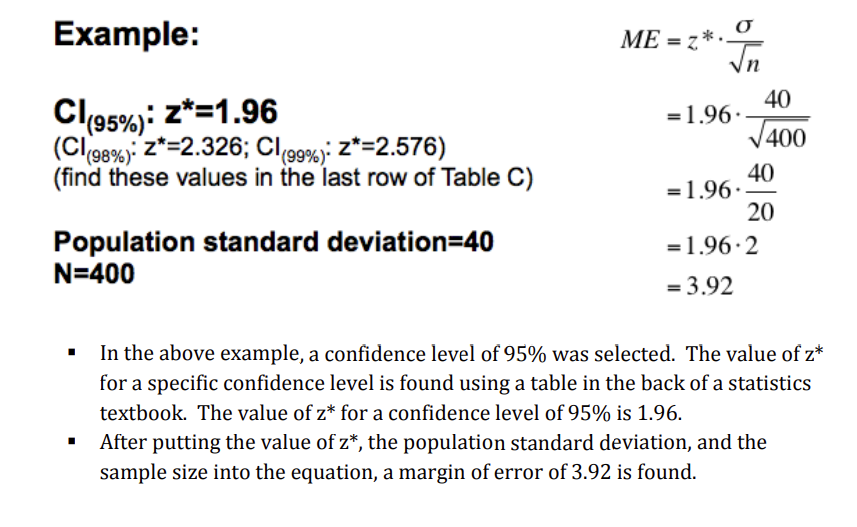

##defining the standard deviation function for calculating

In [47]:
import math
z_95 = 1.96
z_98 = 2.326
z_99 = 2.576
def standard_deviation_inverse_calc(pop, z = 1.96):
  sigma = (z/math.sqrt(pop))**-1
  return sigma


##calculating the Standard deviations

In [57]:
Likud = polls[['Poll_Size', 'Likud']].copy()
Likud = Likud.dropna()
stdv = Likud['Poll_Size']
type(stdv)
for i in range(1, len(stdv)+1):
  stdv[i] = standard_deviation_inverse_calc(stdv[i])
Likud['Standard_Deviation'] = stdv

display(Likud)

,Poll_Size,Likud,Standard_Deviation
1,15.306122,31.0,15.306122
2,16.944614,30.0,16.944614
3,16.134070,32.0,16.134070
4,19.130952,31.0,19.130952
5,16.222564,30.0,16.222564
...,...,...,...
67,13.508370,28.0,13.508370
68,12.105929,29.0,12.105929
69,11.408510,28.0,11.408510
70,11.745780,26.0,11.745780


In [ ]:

Likud_simulated = pd.DataFrame
Likud_simulated.index = just_polls_parties.index
for index, row in Likud.iterrows():
  Likud['simulated'] = random

In [ ]:
for X in 

#bootstrapping

In [ ]:
from pandas.core.dtypes.api import is_dtype_equal
# this one works just_polls_parties_Lowess.index.dtype
just_polls_blocks.index = just_polls_parties.index
result =  just_polls_blocks.index.dtype
print("Output:")
print(result)

Defining the bootstrap function

In [ ]:
import scipy.interpolate
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
def bootstrap(x, y, xgrid):
    samples = np.random.choice(len(x), 50, replace=True)
    y_s = y[samples]
    x_s = x[samples]
    y_sm = sm_lowess(y_s,x_s, frac=1./5., it=5,
                     return_sorted = False)
    # regularly sample it onto the grid
    #TODO: interpolate doesn't seem to be working
    y_grid = scipy.interpolate.interp1d(x_s, y_sm, 
                                        fill_value='extrapolate')(xgrid)
    display(y_grid)
    return y_grid

bootstrap test

In [ ]:
display(xgrid)
size(xgrid)

In [ ]:
test = bootstrap(Likud_seconds['Date'], Likud_seconds['Likud'], xgrid);
display(test)

In [ ]:
display(just_polls.index.dtype)

In [ ]:
from datetime import datetime, date, timedelta
import calendar

# setting the start date to convert from date time to linear integer seconds: 5/26/2020  00:02:39 AM 
start_date = datetime(2020, 5, 26, 00, 2,39) 
display(type(start_date))
display(start_date)

In [ ]:
just_polls_parties_Lowess.index

Time conversion of the indexes divided by 10000 to shorten the x axis.

In [ ]:
start_date = datetime(2020, 5, 26, 00, 2 , 39 )
time_index = (just_polls_parties.index.copy() - start_date)
Likud_seconds = pd.DataFrame(time_index.total_seconds())
Likud_seconds = Likud_seconds /10000

print(Likud_seconds)
display(type(Likud_seconds))


In [ ]:
Likud_seconds['Likud'] = just_polls_parties['Likud'].iloc[::-1].to_numpy()
display(Likud_seconds)
sea.pointplot(Likud_seconds['Date'],Likud_seconds['Likud']);

In [ ]:
display(Likud_seconds['Date'])

setting up my variables

In [ ]:
from numpy.core.function_base import linspace
x = Likud_seconds['Date']
y = Likud_seconds['Likud']
xgrid = np.linspace(x.min(),x.max())
display(xgrid)

In [ ]:
#times to run the lowess guesser
K = 159
#smooths = np.stack([smooth(x, y, xgrid) for k in range(K)]).T
smooths = np.stack([bootstrap(x, y, xgrid) for k in range(K)]).T
plt.plot(smooths, x, color='tomato', alpha=0.25);


In [ ]:
def lowess(x, y, f=1./3.):
    """
    Basic LOWESS smoother with uncertainty. 
    Note:
        - Not robust (so no iteration) and
             only normally distributed errors. 
        - No higher order polynomials d=1 
            so linear smoother.
    """
    # get some paras
    xwidth = f*(x.max()-x.min()) # effective width after reduction factor
    N = len(x) # number of obs
    # Don't assume the data is sorted
    order = np.argsort(x)
    # storage
    y_sm = np.zeros_like(y)
    y_stderr = np.zeros_like(y)
    # define the weigthing function -- clipping too!
    tricube = lambda d : np.clip((1- np.abs(d)**3)**3, 0, 1)
    # run the regression for each observation i
    for i in range(N):
        dist = np.abs((x[order][i]-x[order]))/xwidth
        w = tricube(dist)
        # form linear system with the weights
        A = np.stack([w, x[order]*w]).T
        b = w * y[order]
        ATA = A.T.dot(A)
        ATb = A.T.dot(b)
        # solve the syste
        sol = np.linalg.solve(ATA, ATb)
        # predict for the observation only
        yest = A[i].dot(sol)# equiv of A.dot(yest) just for k
        place = order[i]
        y_sm[place]=yest 
        sigma2 = (np.sum((A.dot(sol) -y [order])**2)/N )
        # Calculate the standard error
        y_stderr[place] = np.sqrt(sigma2 * 
                                A[i].dot(np.linalg.inv(ATA)
                                                    ).dot(A[i]))
    return y_sm, y_stderr

#run it
y_sm, y_std = lowess(x, y, f=1./5.)
# plot it
plt.plot(x[order], y_sm[order], color='tomato', label='LOWESS')
plt.fill_between(x[order], y_sm[order] - 1.96*y_std[order],
                 y_sm[order] + 1.96*y_std[order], alpha=0.3, label='LOWESS uncertainty')
plt.plot(x, y, 'k.', label='Observations')
plt.legend(loc='best')
#run it
y_sm, y_std = lowess(x, y, f=1./5.)
# plot it
plt.plot(x[order], y_sm[order], color='tomato', label='LOWESS')
plt.fill_between(x[order], y_sm[order] - y_std[order],
                 y_sm[order] + y_std[order], alpha=0.3, label='LOWESS uncertainty')
plt.plot(x, y, 'k.', label='Observations')
plt.legend(loc='best')